# Fully connected two-layer classifier network

## Notes

* TensorFlow : *Machine learning framework* [[Link]](https://www.tensorflow.org/)
* Keras : *High level neural networks application programming interface (API) which has been integrated into TensorFlow* [[Link]](https://keras.io/)


* **Keras** is written in Python and uses TensorFlow as a back-end on CPUs and GPUs. It was developed with a focus on enabling fast experimentation and prototyping through user friendliness, modularity, and extensibility.


## Create a fully connected two-layer classifier network in Keras

### Import required Python libraries



In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD

### Import and shape the dataset

* typically the data should be pre-processed and shaped before being imported
* typically the dataset, comprising a set of **input:ouput pairs**, is split in a **seen** dataset used for *training* and *validating* the neural network, and an **unseen** dataset used for *testing* the performance of the trained neural network with: <br>
sklearn.model_selection.train_test_split
* the output class of each sample needs to be **one-hot encoded** for classification applications

* Importing and shaping the data *

input_train (original):  (60000, 28, 28)
input_test (original):  (10000, 28, 28)

input_train :  (60000, 28, 28, 1)
output_train_class :  (60000,)
output_train_class_onehot :  (60000, 10)

input_test :  (10000, 28, 28, 1)
output_test_class :  (10000,)
output_test_class_onehot :  (10000, 10)

output_class_names :  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

item_id :  5
output_train_class [item_id] :  2
output_train_class_onehot [item_id] :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


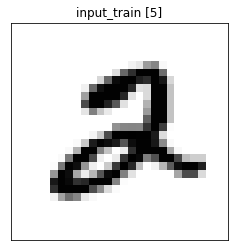

In [0]:
print('* Importing and shaping the data *')
print()

mnist = tf.keras.datasets.mnist  # load mnist dataset from tensorflow
(input_train, output_train_class), (input_test, output_test_class) = mnist.load_data()

print('input_train (original): ', input_train.shape)
print('input_test (original): ', input_test.shape)
print()

input_train= input_train.reshape(input_train.shape[0], 28, 28, 1)  # add an extra dimension to array
input_test= input_test.reshape(input_test.shape[0], 28, 28, 1)

input_train = input_train / 255.0  # max normalise the image data[0:1]
input_test = input_test / 255.0

output_train_class_onehot = tf.keras.utils.to_categorical(output_train_class, 10)  # create one-hot encoded class
output_test_class_onehot = tf.keras.utils.to_categorical(output_test_class, 10)

output_class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']    # class names string

print('input_train : ', input_train.shape)
print('output_train_class : ', output_train_class.shape)
print('output_train_class_onehot : ', output_train_class_onehot.shape)
print()
print('input_test : ', input_test.shape)
print('output_test_class : ', output_test_class.shape)
print('output_test_class_onehot : ', output_test_class_onehot.shape)
print()
print('output_class_names : ', output_class_names)
print()

item_id = 5

print('item_id : ', item_id)
print('output_train_class [item_id] : ', output_train_class[item_id])
print('output_train_class_onehot [item_id] : ', output_train_class_onehot[item_id, :])

plt.imshow(input_train[item_id, :, :, 0], cmap=plt.cm.binary)
plt.title('input_train [' + str(item_id) + ']')
plt.grid(None)
plt.xticks([])
plt.yticks([])
plt.show()

### Define the network hyperparameters

* **hyperparameters** are the variables which determine the network structure and how the network is trained
* structural hyperparameters: number of hidden layers, number of nodes in each layer...
* training hyperparameters: learning rate, dropout ratio, number of epochs...
* hyperparameters are set before training

In [0]:
optimizer_type = SGD(lr=0.2)  # optimisation algorithm: SGD stochastic gradient decent 
loss = 'categorical_crossentropy'  # loss (cost) function to be minimised by the optimiser
metrics = ['categorical_accuracy']  # network accuracy metric to be determined after each epoch
dropout_ratio = 0.0  # % of nodes in the hidden layer to dropout during back-propagation update of the network weights
validtrain_split_ratio = 0.2  # % of the seen dataset to be put aside for validation, rest is for training
max_epochs = 40  # maxmimum number of epochs to be iterated
batch_size = 500   # batch size for the training data set
batch_shuffle = True   # shuffle the training data prior to batching before each epoch
num_hidden_nodes = 256  # number of nodes in hidden fully connected layer

### Define the network architecture

* using the Keras' *functional* model  [[Link]](https://keras.io/models/model/)
* can also use Keras' *sequential* model but limited to simpler architectures  [[Link]](https://keras.io/models/sequential/)
* can specify the type of each layer, for example dense (fully connected), convolutional, dropout etc. [[Link]](https://keras.io/layers/about-keras-layers/)
* can specify the activation function to be used in each layer, for example sigmoid, relu etc. [[Link]](https://keras.io/activations/)
* **softmax** activation, also known as *softargmax* or *normalized exponential function*, is typically used for the final layer of a classifier network to normalise its output into a probability distribution of the classes
* network weights are typically initialised with random values


In [0]:
input_shape = (28, 28, 1)
inputs = Input(shape=input_shape)

flatten = Flatten()(inputs)   # 784 nodes = 28x28

dense_01 = Dense(num_hidden_nodes)(flatten)
dense_01 = Activation('sigmoid')(dense_01)
dense_01 = Dropout(dropout_ratio)(dense_01)

dense_02 = Dense(10)(dense_01)
outputs = Activation('softmax')(dense_02)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Compile the network

* compile the defined network architecture with the stated **optimizer algorithm** [[Link]](https://keras.io/optimizers/), **loss (cost) function**  [[Link]](https://keras.io/losses/), and **accuracy metrics** [[Link]](https://keras.io/metrics/) using: .compile()
* number of parameters (weights) for a fully connected layer: <br> $n^{weights}_{0}=(n^{nodes}_{-1}+1).n^{nodes}_{0}$
* print network architecture using: .summary()
* create and save a schematic image of the network architecture using: .plot_model()
* schematic image saved to the runtime disk, remember to download to local machine before termination


* Compiling the network model *

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_1 (Activation)  

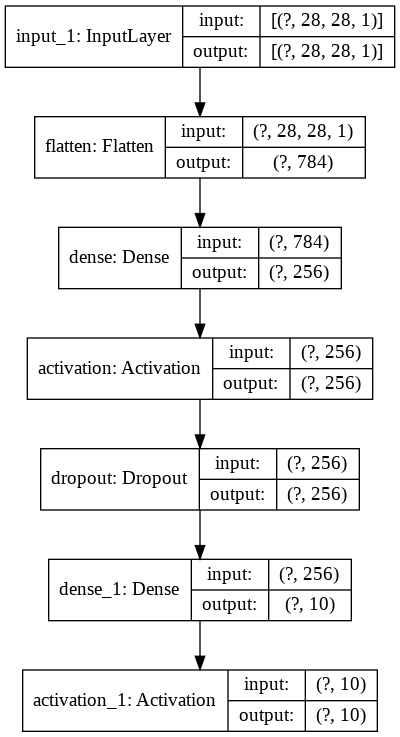

In [0]:
print()
print('* Compiling the network model *')
print()

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)

# display a summary of the compiled neural network

print(model.summary())  
print()

# create and save a schematic image of the network architecture

from tensorflow.keras.utils import plot_model
from IPython.display import Image

print('Graphical schematic of the compiled network')
print()

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(filename='model.png')

### Train the neural network with the training dataset

* the **seen** dataset is split into **training** and **validation** subsets
* the training set can be broken down into **batches**
* the network weights are updated after each training batch by back propagation using the **optimiser** algorithm to minimise the **loss (cost) function**
* one **epoch** is one training cycle of all training batches
* after all training batches have been processed in an epoch, the network is tested with the validation data set and the resulting loss function and accuracy metrics are displayed
* the training data can be shuffled and rebatched before each epoch
* training continues until the stated maximum number of epochs has been reached or an early stop criteria has been satisfied, for example when the loss (cost) function begins to increase

In [0]:
print('* Training the compiled network *')
print()

history = model.fit(input_train, output_train_class_onehot, \
                    batch_size=batch_size, \
                    epochs=max_epochs, \
                    validation_split=validtrain_split_ratio, \
                    shuffle=batch_shuffle)

print()
print('Training completed')
print()

* Training the compiled network *

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 1s 16us/sample - loss: 1.3750 - categorical_accuracy: 0.6702 - val_loss: 0.7834 - val_categorical_accuracy: 0.8400
Epoch 2/40
48000/48000 [==============================] - 0s 9us/sample - loss: 0.6598 - categorical_accuracy: 0.8483 - val_loss: 0.5178 - val_categorical_accuracy: 0.8787
Epoch 3/40
48000/48000 [==============================] - 0s 9us/sample - loss: 0.5014 - categorical_accuracy: 0.8745 - val_loss: 0.4292 - val_categorical_accuracy: 0.8904
Epoch 4/40
48000/48000 [==============================] - 0s 9us/sample - loss: 0.4347 - categorical_accuracy: 0.8844 - val_loss: 0.3862 - val_categorical_accuracy: 0.8960
Epoch 5/40
48000/48000 [==============================] - 0s 9us/sample - loss: 0.3988 - categorical_accuracy: 0.8907 - val_loss: 0.3607 - val_categorical_accuracy: 0.9007
Epoch 6/40
48000/48000 [==============================

### Plot the training history of the network

* usefull for seeing the convergence of the training, oscillations of the cost function between local minima, and the presence of over fitting

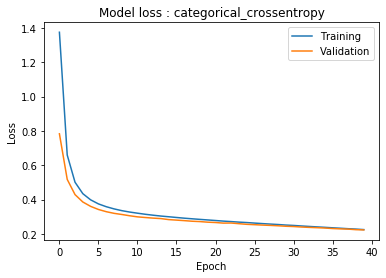

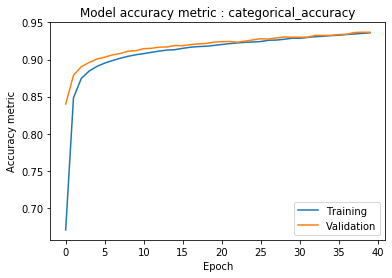

In [0]:
# model loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss : ' + loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()
plt.close()

# model accuracy metric

plt.plot(np.array(history.history[metrics[0]]))
plt.plot(np.array(history.history['val_' + metrics[0]]))
plt.title('Model accuracy metric : ' + metrics[0])
plt.ylabel('Accuracy metric')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()
plt.close()

### Evaluate the trained network performance on the unseen test dataset

* the performance of the trained network on unseen data can be assessed using: .evaluate()

In [0]:
print('* Evaluating the performance of the trained network on the unseen test dataset *')
print()

evaluate_model = model.evaluate(x=input_test, y=output_test_class_onehot)
loss_metric = evaluate_model [0]
accuracy_metric = evaluate_model [1]

print()
print('Accuracy - ' + metrics[0] + ': %0.3f'%accuracy_metric)
print('Loss - ' + loss + ': %0.3f'%loss_metric)

* Evaluating the performance of the trained network on the unseen test dataset *

10000/10000 [==============================] - 0s 49us/sample - loss: 0.2249 - categorical_accuracy: 0.9352

Accuracy - categorical_accuracy: 0.935
Loss - categorical_crossentropy: 0.225


### Create and display the test set classification report

* provides in-depth statistics of the test data predictions provided by the trained neural network

In [0]:
from sklearn.metrics import classification_report

output_predict_class_onehot = model.predict(input_test)
output_predict_class = np.argmax(output_predict_class_onehot, axis=1)

print('* Test set classification report *')
print()
print(classification_report(output_test_class, output_predict_class,  \
                            target_names=output_class_names))

* Test set classification report *

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.94      0.91      0.93      1032
           3       0.92      0.92      0.92      1010
           4       0.93      0.94      0.94       982
           5       0.94      0.89      0.91       892
           6       0.94      0.96      0.95       958
           7       0.94      0.93      0.93      1028
           8       0.91      0.91      0.91       974
           9       0.92      0.91      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.94      0.94      0.94     10000



### Display the test set confusion probability matrix

. usefull of seeing if and which classes the trained network mixes up

* Confusion probability matrix *



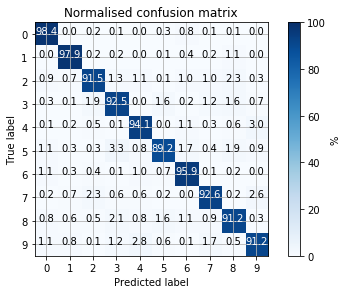

In [0]:
print('* Confusion probability matrix *')
print()

import itertools

from sklearn.metrics import confusion_matrix


confusion_matrix = confusion_matrix(output_test_class, output_predict_class)  # confusion matrix

confusion_probability_matrix = confusion_matrix.astype('float') / \
                               confusion_matrix.sum(axis=1)[:, np.newaxis]  # row normalisation of confusion matrix
confusion_probability_matrix = confusion_probability_matrix * 100.0  # confusion probability matrix

plt.imshow(confusion_probability_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalised confusion matrix')    
plt.colorbar(label='%')
plt.clim(0, 100)
tick_marks = np.arange(len(output_class_names))
plt.xticks(tick_marks, output_class_names, rotation=0)
plt.yticks(tick_marks, output_class_names)
fmt = '.1f'
thresh = confusion_probability_matrix.max() / 2.0
for i, j in itertools.product(range(confusion_probability_matrix.shape[0]), range(confusion_probability_matrix.shape[1])):
    plt.text(j, i, format(confusion_probability_matrix[i, j], fmt),
             horizontalalignment='center',
             color='white' if confusion_probability_matrix[i, j] > thresh else 'black')    
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid(None)
plt.show()
plt.close()

### Predict the class of a given input

* might need to reshape the input to match the network input shape
* need to apply an argmax to the estimated probabilty distribution provided by the trained network to define the predicted class

* Predicting the class of a given input *

test_id :  38

output_predict_class_onehot [test_id]: 

 [[1.0009985e-02 2.7267628e-03 7.2106683e-01 2.1292894e-01 3.2919040e-08
  3.8750134e-02 3.2550876e-03 1.1100296e-05 1.1222429e-02 2.8706954e-05]]

sum[output_predict_class_onehot [test_id]] :  1.0

output_predict_class [item_id] :  2



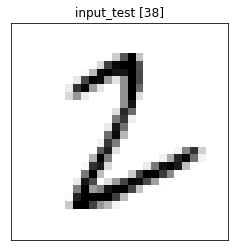

In [0]:
print('* Predicting the class of a given input *')
print()

test_id = 38

input_predict = np.zeros(shape=(1, 28, 28, 1))  # create numpy array of required dimensions for network input

input_predict[0, :, :, 0] = input_test[test_id, :, :, 0]  # reshaping test input image

output_predict_class_onehot = model.predict(input_predict)  # softmax distribution of predicted class

output_predict_class = np.argmax(output_predict_class_onehot[0])  # predicted class of input

print('test_id : ', test_id)
print()
print('output_predict_class_onehot [test_id]: \n\n', output_predict_class_onehot)
print()
print('sum[output_predict_class_onehot [test_id]] : ', np.sum(output_predict_class_onehot))  # should be = 1.0
print()
print('output_predict_class [item_id] : ', output_predict_class)
print()

plt.imshow(input_test[test_id, :, :, 0], cmap=plt.cm.binary)
plt.title('input_test [' + str(test_id) + ']')
plt.grid(None)
plt.xticks([])
plt.yticks([])
plt.show()


# Coursework 4

## Function that will be used for all tasks

In [0]:
def train_model(
    input_train=input_train,
    output_train_class_onehot=output_train_class_onehot,
    optimizer_type=SGD(lr=0.2),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'],
    dropout_ratio=0.0,
    validtrain_split_ratio=0.2,
    max_epochs=40,
    batch_size=500,
    batch_shuffle=True,
    num_hidden_nodes=256):
    """Train a DNN with the given hyperparameters"""
    # Define the network architecture
    input_shape = (28, 28, 1)
    inputs = Input(shape=input_shape)

    flatten = Flatten()(inputs)   # 784 nodes = 28x28

    dense_01 = Dense(num_hidden_nodes)(flatten)
    dense_01 = Activation('sigmoid')(dense_01)
    dense_01 = Dropout(dropout_ratio)(dense_01)

    dense_02 = Dense(10)(dense_01)
    outputs = Activation('softmax')(dense_02)

    # Compile the network
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)

    # Display a summary of the compiled neural network
    print(model.summary())  
    print()

    # Training
    print('* Training the compiled network *')
    print()

    history = model.fit(input_train, output_train_class_onehot,
                        batch_size=batch_size,
                        epochs=max_epochs,
                        validation_split=validtrain_split_ratio,
                        shuffle=batch_shuffle)

    print()
    print('Training completed')
    print()

    return model, history

In [0]:
def test_model(model, input_test=input_test, output_test_class_onehot=output_test_class_onehot):
    """Test a model and get accuracy and loss"""
    print('* Evaluating the performance of the trained network on the unseen test dataset *')
    print()

    evaluate_model = model.evaluate(x=input_test, y=output_test_class_onehot)
    loss_metric = evaluate_model [0]
    accuracy_metric = evaluate_model [1]

    print()
    print('Accuracy - ' + metrics[0] + ': %0.3f'%accuracy_metric)
    print('Loss - ' + loss + ': %0.3f'%loss_metric)
    print()

    return accuracy_metric, loss_metric

## Task 1 - Change the number of nodes in the hidden layer

### The hyperparameters to change

In [0]:
num_hidden_nodes_list = [2, 20, 100, 200, 1000, 2000]

### Train models and save testing accuracy

In [0]:
test_accs_task_1 = []

for num_hidden_nodes in num_hidden_nodes_list:
    print(f'Number of hidden nodes: {num_hidden_nodes}')
    model, _ = train_model(num_hidden_nodes=num_hidden_nodes)
    test_acc, _ = test_model(model=model)
    test_accs_task_1.append(test_acc)

Number of hidden nodes: 2
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1570      
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_3 (Activation)    (Non

### Plot testing accuracy vs. number of nodes

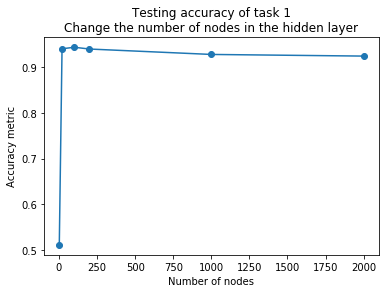

In [0]:
plt.plot(num_hidden_nodes_list, test_accs_task_1, '-o')
plt.title('Testing accuracy of task 1\nChange the number of nodes in the hidden layer')
plt.ylabel('Accuracy metric')
plt.xlabel('Number of nodes')
plt.show()
plt.close()

## Task 2 - Change the learning rate

### The hyperparameters to change

In [0]:
lrs = [0.2, 0.6, 1, 2, 4, 6]

### Train models and save testing accuracy

In [0]:
test_accs_task_2 = []

for lr in lrs:
    print(f'Learning rate: {lr}')
    model, _ = train_model(optimizer_type=SGD(lr=lr))
    test_acc, _ = test_model(model=model)
    test_accs_task_2.append(test_acc)

Learning rate: 0.2
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_15 (Activation)   (None, 10) 

### Plot testing accuracy vs. learning rate

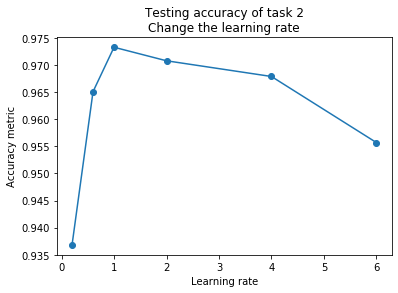

In [0]:
plt.plot(lrs, test_accs_task_2, '-o')
plt.title('Testing accuracy of task 2\nChange the learning rate')
plt.ylabel('Accuracy metric')
plt.xlabel('Learning rate')
plt.show()
plt.close()

## Task 3 - Rotate images in the test set

### Rotate testing images

In [0]:
from skimage.transform import rotate

In [0]:
input_test_rotated = []
rotation_angles = range(0, 91, 10)

for ang in rotation_angles:
    print(f'Rotating images by {ang} degree')
    input_test_rotated.append(np.array([rotate(img, ang) for img in input_test]))

Rotating images by 0 degree
Rotating images by 10 degree
Rotating images by 20 degree
Rotating images by 30 degree
Rotating images by 40 degree
Rotating images by 50 degree
Rotating images by 60 degree
Rotating images by 70 degree
Rotating images by 80 degree
Rotating images by 90 degree


### Train models and save testing accuracy

In [0]:
test_accs_task_3 = []
model, _ = train_model()

for i in range(10):
    print(f'Testing images rotated by {rotation_angles[i]}')
    test_acc, _ = test_model(model=model, input_test=input_test_rotated[i])
    test_accs_task_3.append(test_acc)

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_26 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_27 (Activation)   (None, 10)                0  

### Plot testing accuracy vs. rotation angle

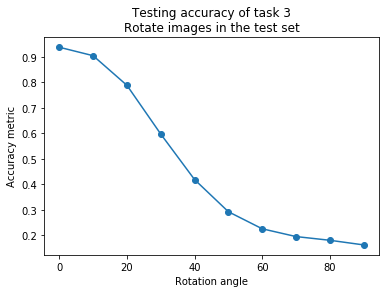

In [0]:
plt.plot(rotation_angles, test_accs_task_3, '-o')
plt.title('Testing accuracy of task 3\nRotate images in the test set')
plt.ylabel('Accuracy metric')
plt.xlabel('Rotation angle')
plt.show()
plt.close()

## Task 4 - Rotate images in both the train and the test set

### Rotate training images

In [0]:
input_train_rotated = []
rotation_angles = range(0, 91, 10)

for ang in rotation_angles:
    print(f'Rotating images by {ang} degree')
    input_train_rotated.append(np.array([rotate(img, ang) for img in input_train]))

Rotating images by 0 degree
Rotating images by 10 degree
Rotating images by 20 degree
Rotating images by 30 degree
Rotating images by 40 degree
Rotating images by 50 degree
Rotating images by 60 degree
Rotating images by 70 degree
Rotating images by 80 degree
Rotating images by 90 degree


### Train models and save testing accuracy

In [0]:
test_accs_task_4 = []

for i in range(10):
    print(f'Training and testing images rotated by {rotation_angles[i]}')
    model, _ = train_model(input_train=input_train_rotated[i])
    test_acc, _ = test_model(model=model, input_test=input_test_rotated[i])
    test_accs_task_4.append(test_acc)

Training and testing images rotated by 0
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_28 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_29 (Ac

### Plot testing accuracy vs. rotation angle

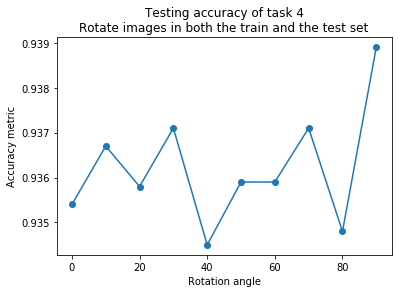

In [0]:
plt.plot(rotation_angles, test_accs_task_4, '-o')
plt.title('Testing accuracy of task 4\nRotate images in both the train and the test set')
plt.ylabel('Accuracy metric')
plt.xlabel('Rotation angle')
plt.show()
plt.close()